# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 18/03/2024        

Grupo 1 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Mario Antonio Guerra Morales 21008
- Kristopher Javier Alvarado Lopez 21188
- David Jonathan Aragon Vasquez 21053

## Proyecto 1
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*owid-co2-data.csv*". A continuación se muestran los resultados: 

In [5]:
import pandas as pd
from typing import *
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import warnings
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
import random
import sklearn
import pyclustertend
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [6]:
dataframe: pd.DataFrame = pd.read_csv("owid-co2-data.csv",  encoding='ISO-8859-1')
infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [7]:
dataframe.columns #Se muestran las columnas del dataframe.

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [8]:
dataframe.describe() #Se describen las características principales de las variables cuantitativas del dataframe.

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,48058.000000,3.949500e+04,1.456400e+04,23764.000000,22017.000000,30308.000000,28157.000000,25136.000000,23320.000000,23030.000000,...,2593.000000,41724.000000,37620.000000,41724.000000,41724.000000,37620.000000,6354.000000,6354.000000,4398.000000,4397.000000
mean,1926.842565,6.083223e+07,2.677586e+11,9.109400,0.066798,391.272161,5.868310,20.055703,534.225708,7.445587,...,19.199870,2.190116,0.002956,0.006886,0.010069,0.000497,790.430981,759.384745,-7.157874,20.368010
std,59.414846,3.285867e+08,2.103151e+12,66.463548,0.125367,1855.824655,59.845871,687.366449,2164.644277,97.593192,...,33.432368,9.012474,0.016068,0.039698,0.057196,0.002943,3610.534250,3531.641287,269.156220,52.720717
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,-2032.366000,-100.000000,-187.847000,-2334.695000,...,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000,-186.660000,0.010000,-2367.758000,-99.795000
25%,1883.000000,3.464375e+05,7.516679e+09,0.000000,0.000000,0.183000,0.000000,-0.733500,5.950750,-0.752750,...,0.249000,0.003000,0.000000,0.000000,0.000000,0.000000,8.450000,7.042500,-3.024750,-6.287000
50%,1930.000000,2.456362e+06,2.597999e+10,0.029000,0.008000,3.856000,0.026000,3.749500,27.777000,0.071000,...,1.431000,0.071000,0.000000,0.000000,0.000000,0.000000,38.285000,30.830000,1.478500,8.741000
75%,1976.000000,1.008038e+07,1.132942e+11,0.834000,0.093000,47.277250,0.873000,10.593500,124.373750,2.568500,...,19.405000,0.329000,0.001000,0.001000,0.001000,0.000000,153.595000,131.512500,9.124000,32.512000
max,2022.000000,7.975105e+09,1.136302e+14,1692.404000,2.574000,37149.785000,1813.064000,102318.508000,41637.617000,2340.859000,...,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000,49880.602000,48089.621000,2187.777000,576.482000


In [9]:
# Seleccionar solo las columnas numéricas en el DataFrame
numeric_columns = dataframe.select_dtypes(include='number').columns

# Aplicar la conversión a media solo a las columnas numéricas
df = dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())

num_nan = df.isna().sum().sum()
print("Número total de NaN en el DataFrame:", num_nan)


Número total de NaN en el DataFrame: 0


In [10]:
column_summary = dataframe['co2'].describe()
column_summary

count    48058.000000
mean       391.272161
std       1473.771272
min          0.000000
25%          1.257750
50%         75.398500
75%        391.272161
max      37149.785000
Name: co2, dtype: float64

c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\s

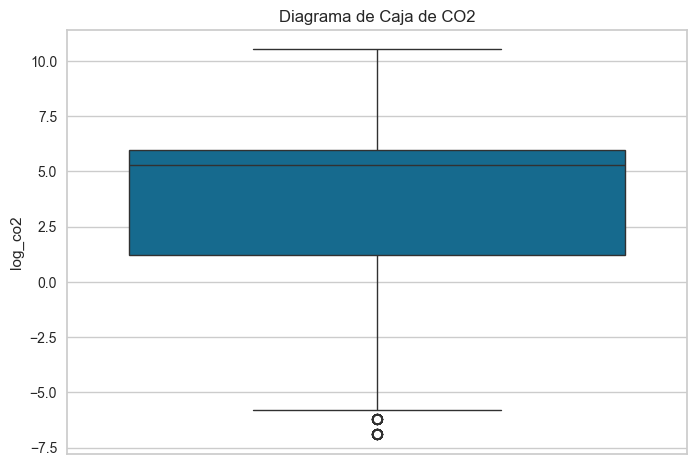

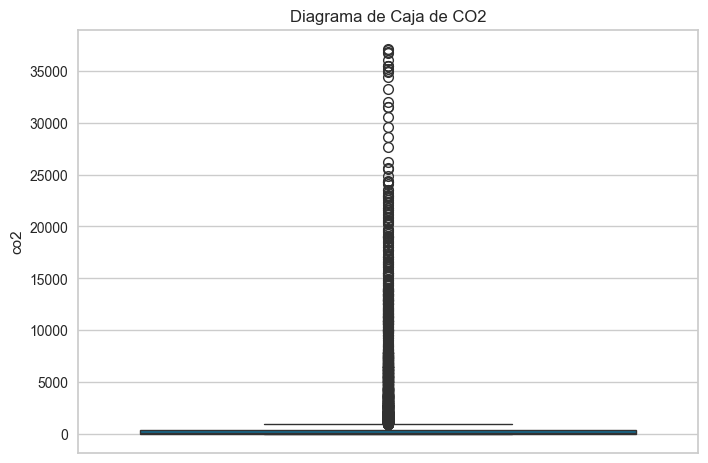

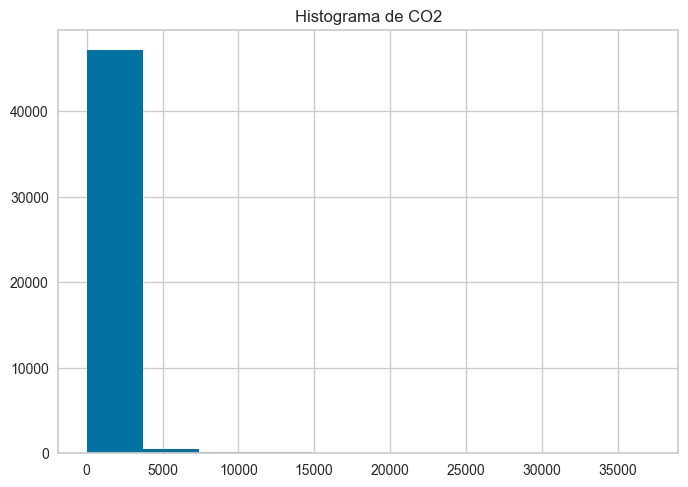

In [19]:
#Gráficos exploratorios del CO2.

import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric_columns:
    dataframe['log_' + column] = np.log(dataframe[column])

sns.boxplot(data=dataframe['log_co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

sns.boxplot(data=dataframe['co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

dataframe['co2'].hist()
plt.title("Histograma de CO2")
plt.show()

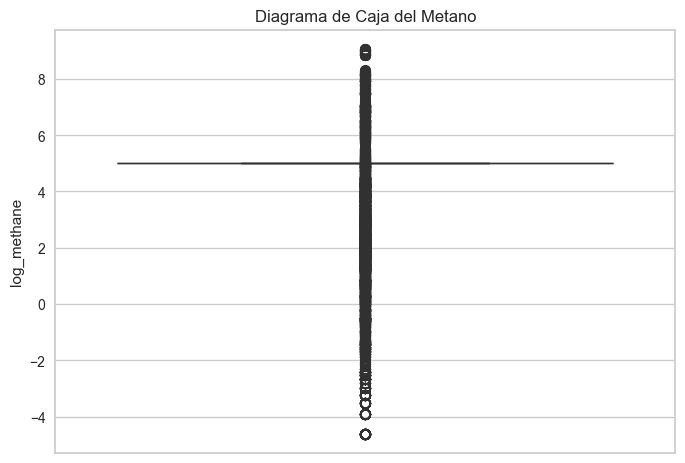

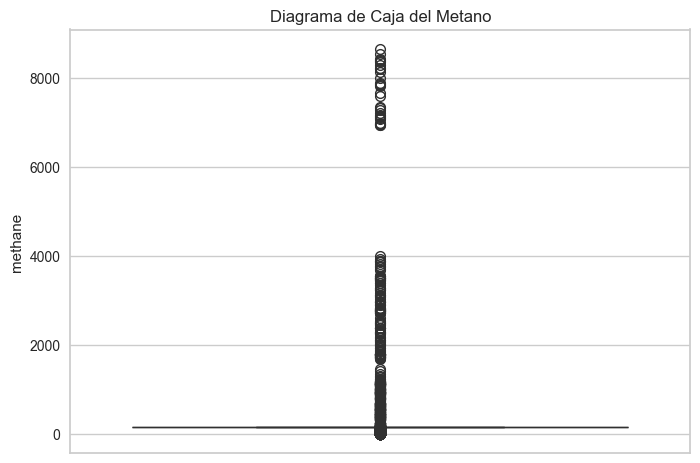

count    48058.000000
mean       150.530700
std        242.267674
min          0.000000
25%        150.530700
50%        150.530700
75%        150.530700
max       8654.750000
Name: methane, dtype: float64

In [20]:
#Gráficos exploratorios del Metano.

sns.boxplot(data=dataframe['log_methane'])
plt.title("Diagrama de Caja del Metano")
plt.show()
sns.boxplot(data=dataframe['methane'])
plt.title("Diagrama de Caja del Metano")
plt.show()

column_summary = dataframe['methane'].describe()
column_summary


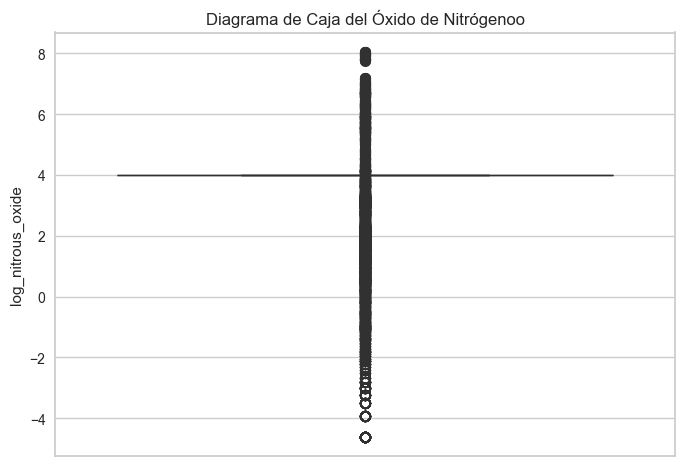

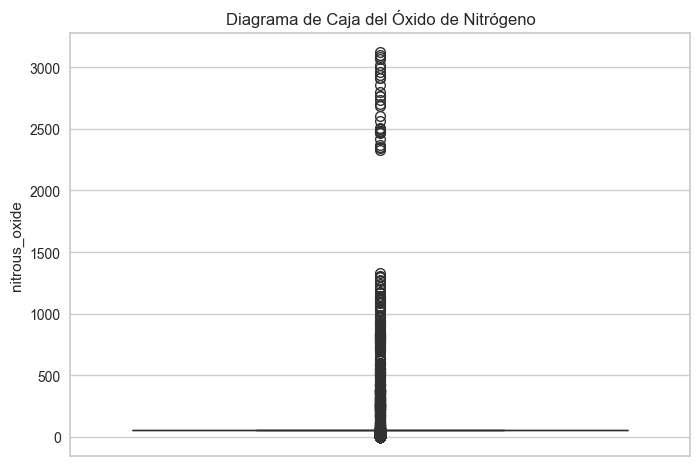

count    48058.000000
mean        53.849023
std         84.637678
min          0.000000
25%         53.849023
50%         53.849023
75%         53.849023
max       3126.700000
Name: nitrous_oxide, dtype: float64

In [23]:
#Gráficos exploratorios del Óxido de Nitrógeno.
sns.boxplot(data=dataframe['log_nitrous_oxide'])
plt.title("Diagrama de Caja del Óxido de Nitrógenoo")
plt.show()
sns.boxplot(data=dataframe['nitrous_oxide'])
plt.title("Diagrama de Caja del Óxido de Nitrógeno")
plt.show()
column_summary = dataframe['nitrous_oxide'].describe()
column_summary

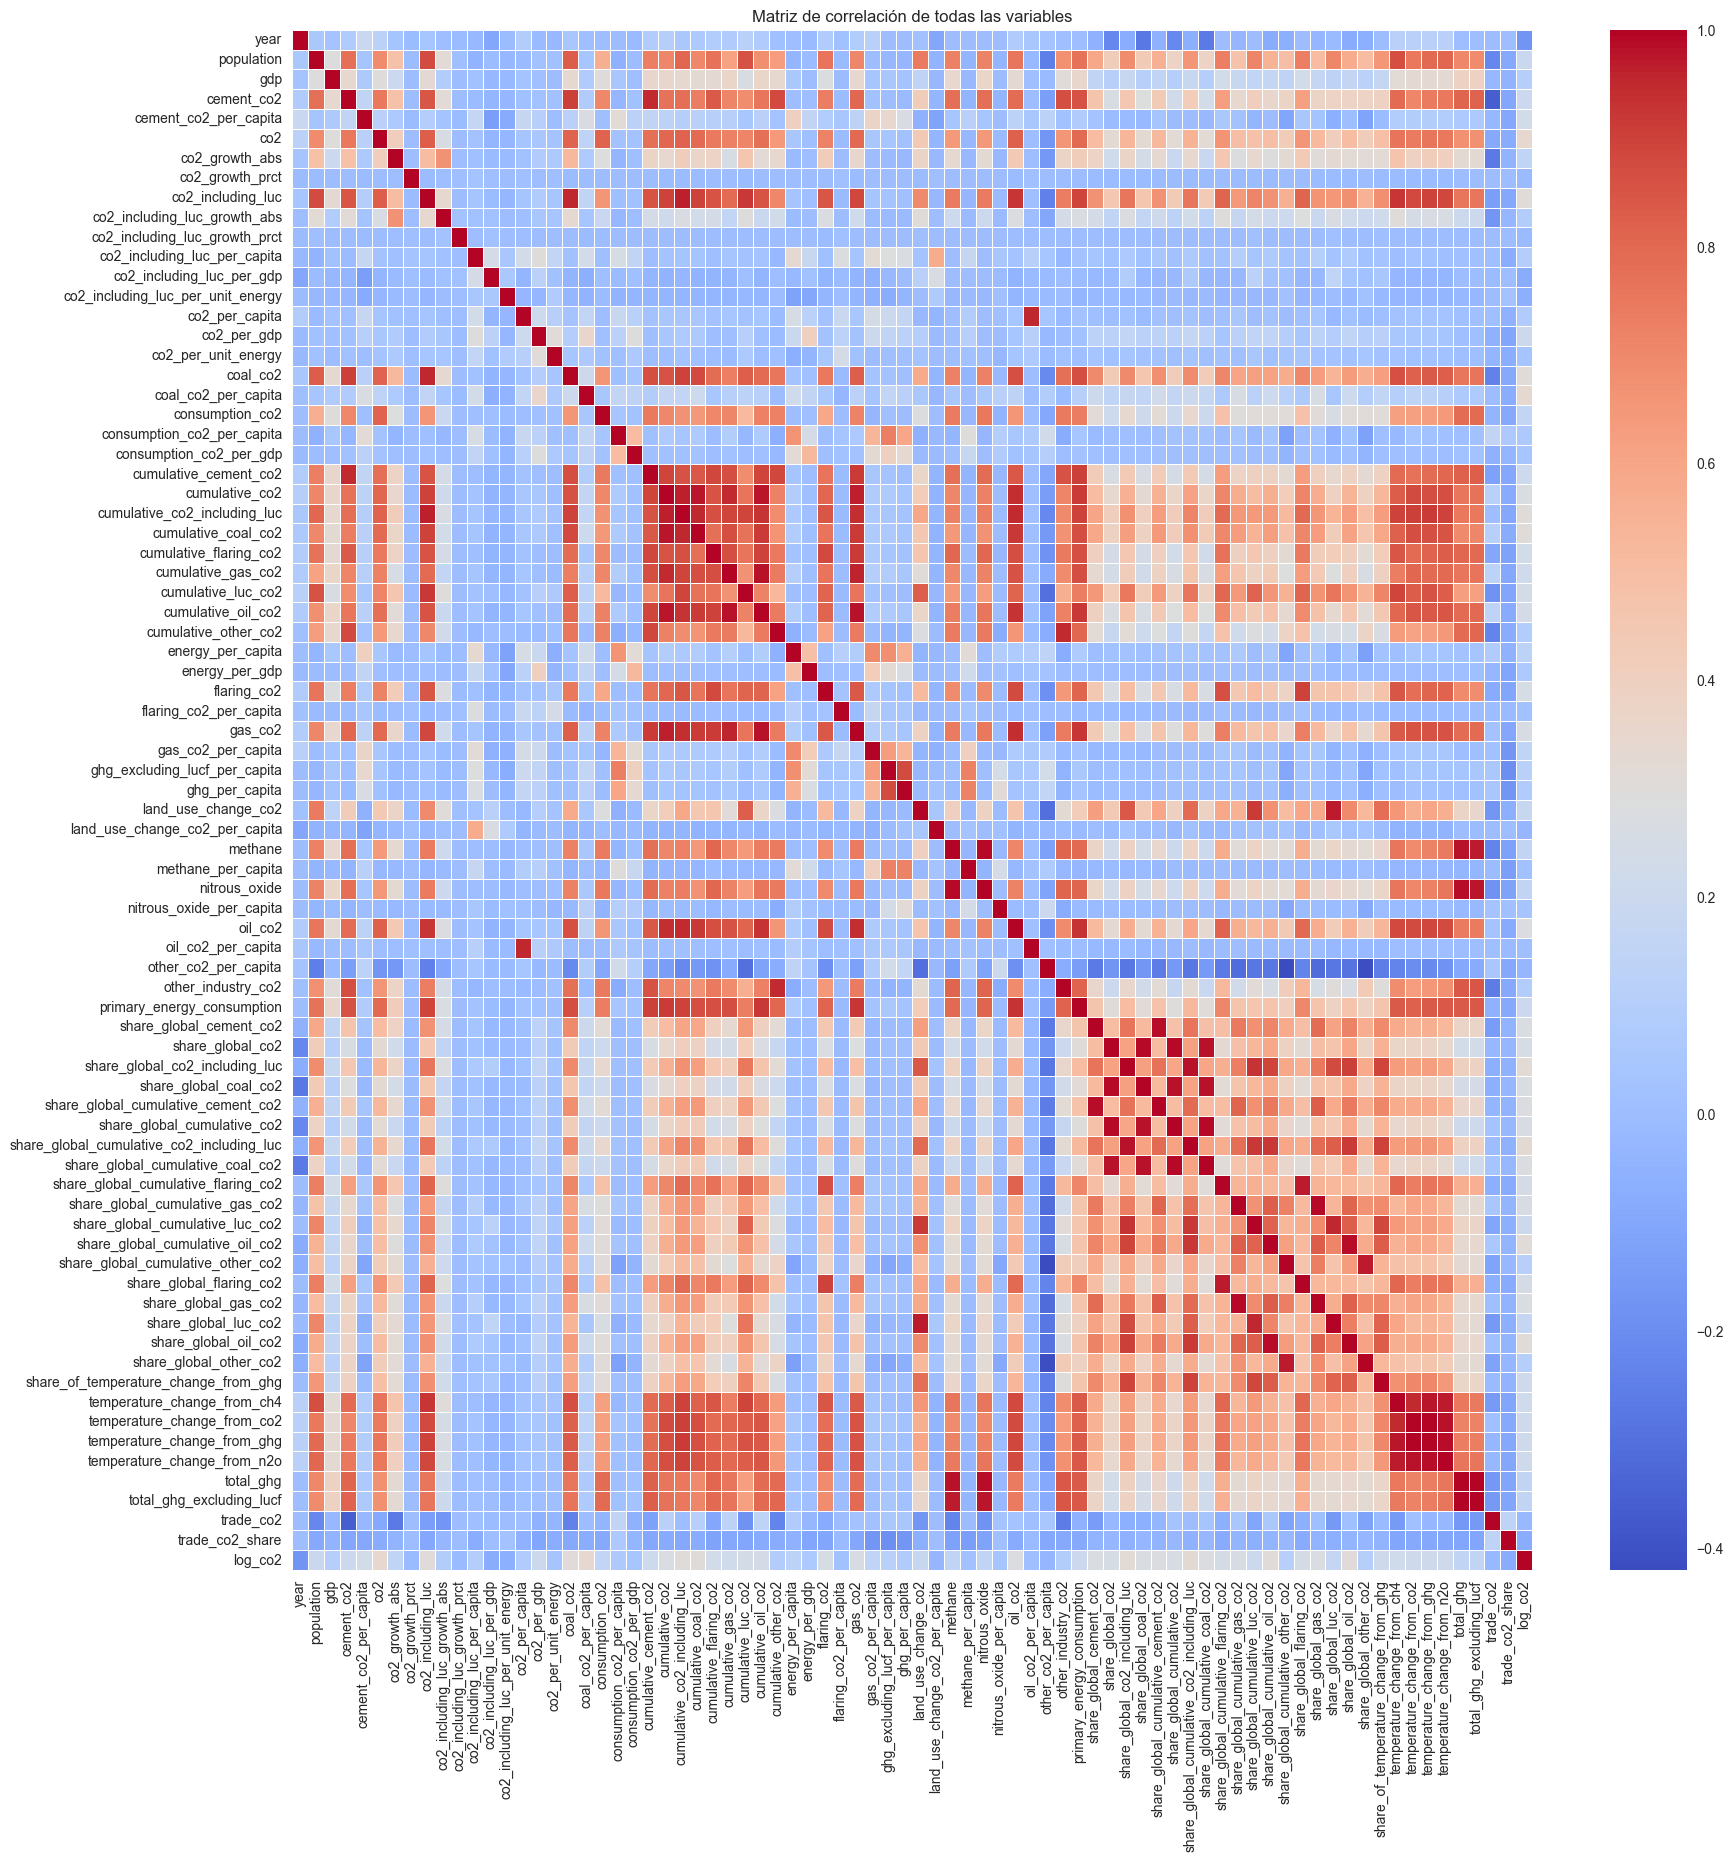

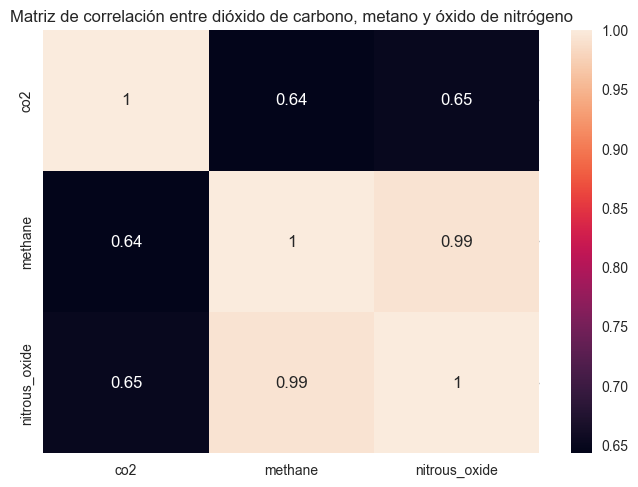

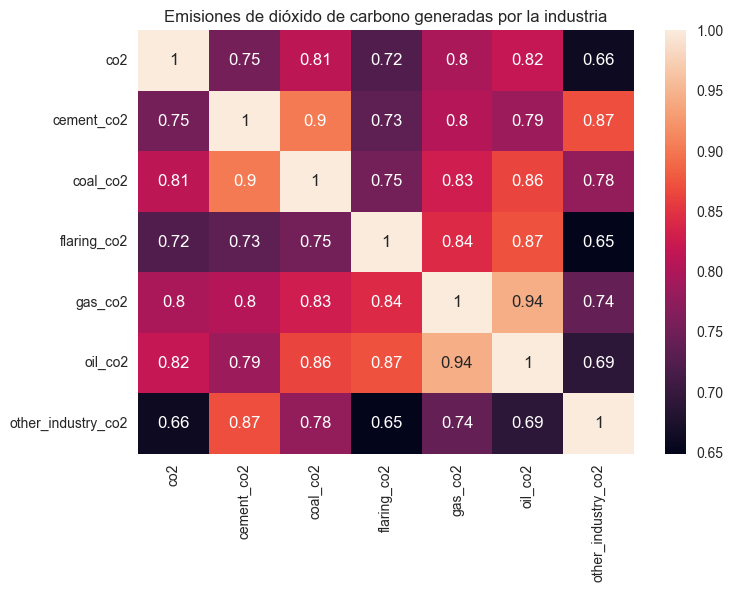

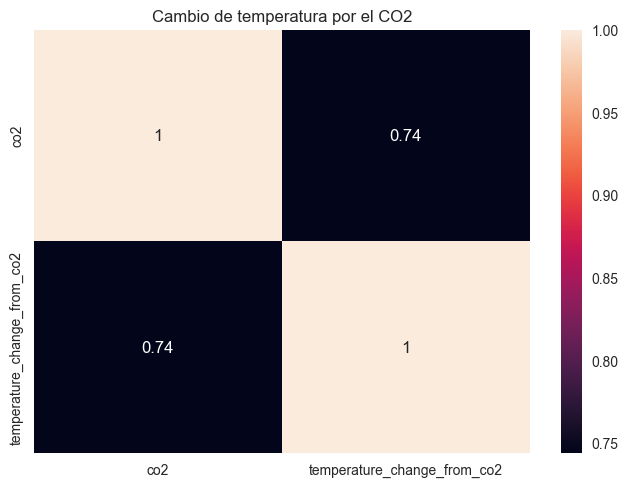

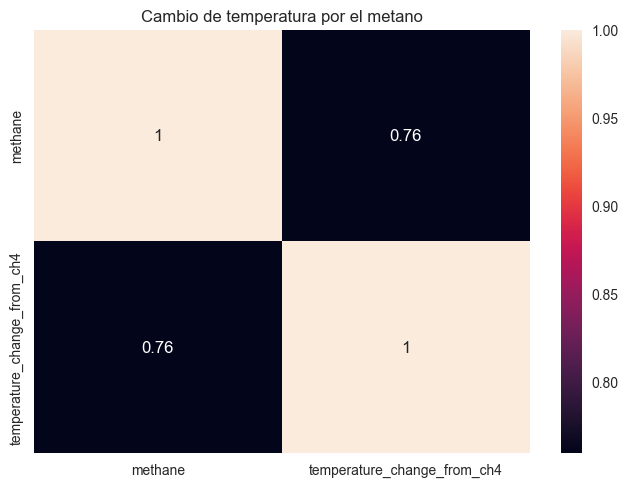

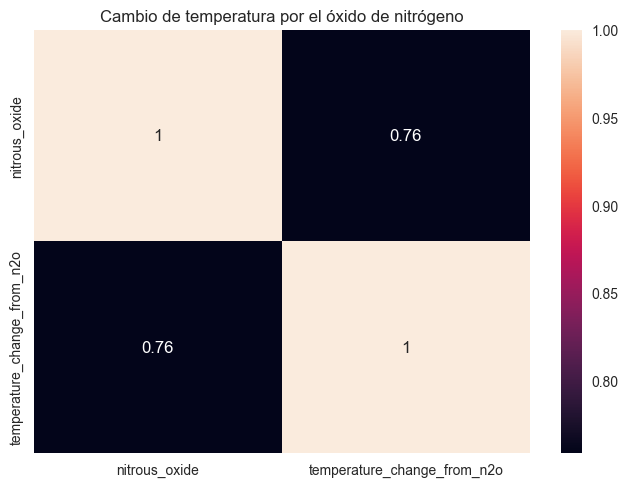

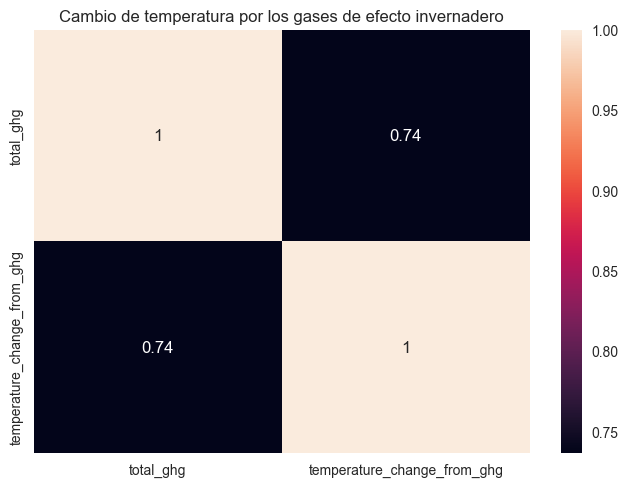

In [29]:
# Análisis de correlaciones.

correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según sea necesario
plt.title("Matriz de correlación de todas las variables")
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Añade anotaciones y especifica el formato
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor visualización
plt.yticks(rotation=0)  # Rota las etiquetas del eje y para una mejor visualización
plt.show()


ghg_variables = ['co2', 'methane', 'nitrous_oxide']

correlation_ghg = dataframe[ghg_variables].corr()
plt.title("Matriz de correlación entre dióxido de carbono, metano y óxido de nitrógeno")
sns.heatmap(correlation_ghg, annot=True)
plt.show()

co2_variables = ['co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']

correlation_co2 = dataframe[co2_variables].corr()
plt.title("Emisiones de dióxido de carbono generadas por la industria")
sns.heatmap(correlation_co2, annot=True)
plt.show()

temperature_variables_co2 = ['co2', 'temperature_change_from_co2']

correlation_tempco2 = dataframe[temperature_variables_co2].corr()
plt.title("Cambio de temperatura por el CO2")
sns.heatmap(correlation_tempco2, annot=True)
plt.show()

temperature_variables_ch4 = ['methane', 'temperature_change_from_ch4']

correlation_tempch4 = dataframe[temperature_variables_ch4].corr()
plt.title("Cambio de temperatura por el metano")
sns.heatmap(correlation_tempch4, annot=True)
plt.show()

temperature_variables_n2o = ['nitrous_oxide', 'temperature_change_from_n2o']

correlation_tempn2o = dataframe[temperature_variables_n2o].corr()
plt.title("Cambio de temperatura por el óxido de nitrógeno")
sns.heatmap(correlation_tempn2o, annot=True)
plt.show()

temperature_variables_ghg = ['total_ghg', 'temperature_change_from_ghg']

correlation_tempghg = dataframe[temperature_variables_ghg].corr()
plt.title("Cambio de temperatura por los gases de efecto invernadero")
sns.heatmap(correlation_tempghg, annot=True)
plt.show()



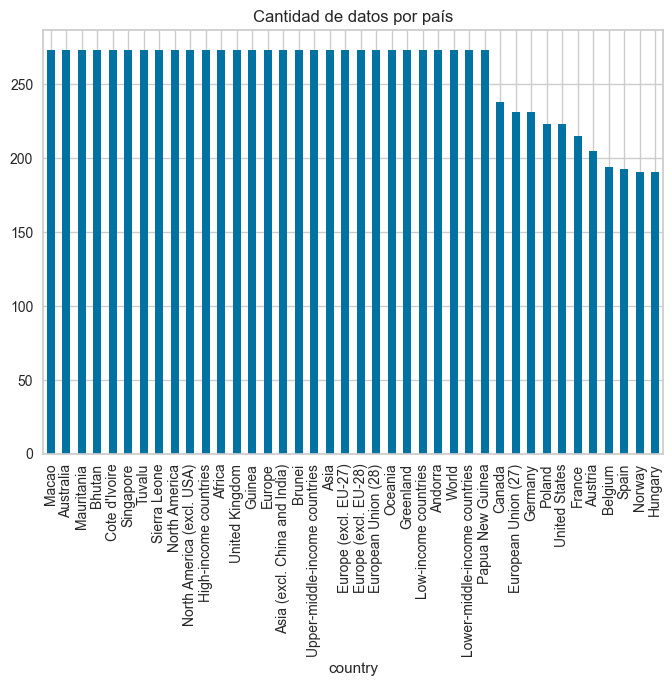

In [12]:
# Estudio de variables categóricas
countries_barplot = dataframe['country'].value_counts()
number_of_bars = 40
limited_countries_barplot = countries_barplot.head(number_of_bars)

limited_countries_barplot.plot(kind='bar')
plt.title('Cantidad de datos por país')
plt.show()

C:\Users\daher\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


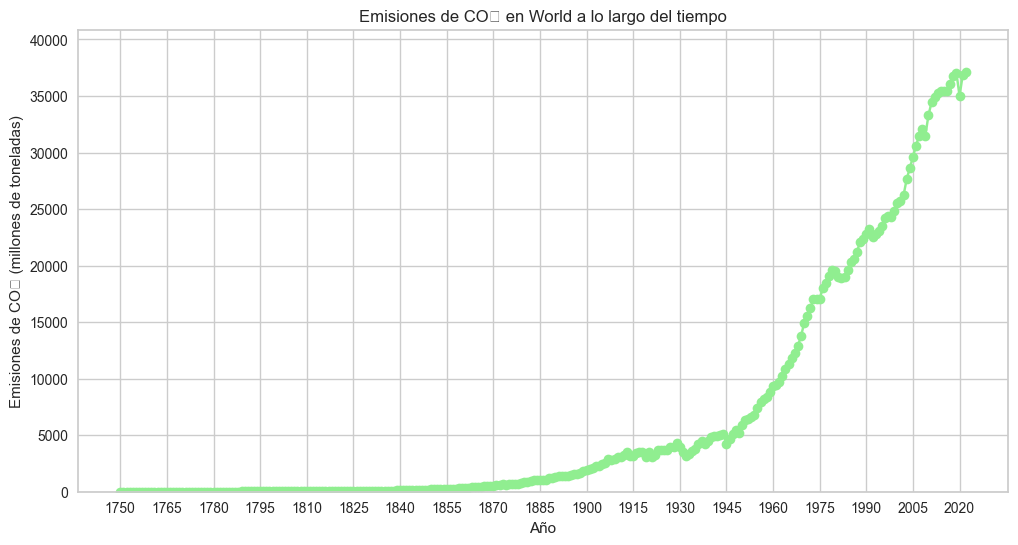

C:\Users\daher\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


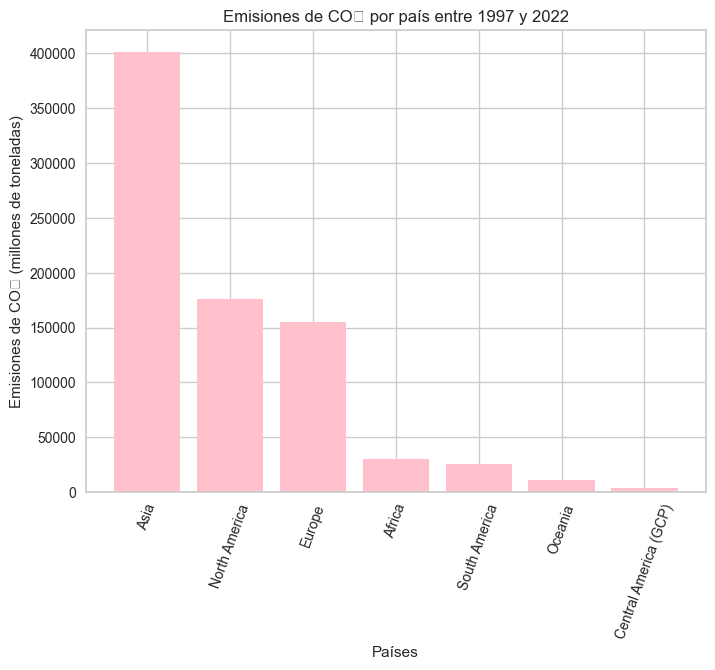

C:\Users\daher\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


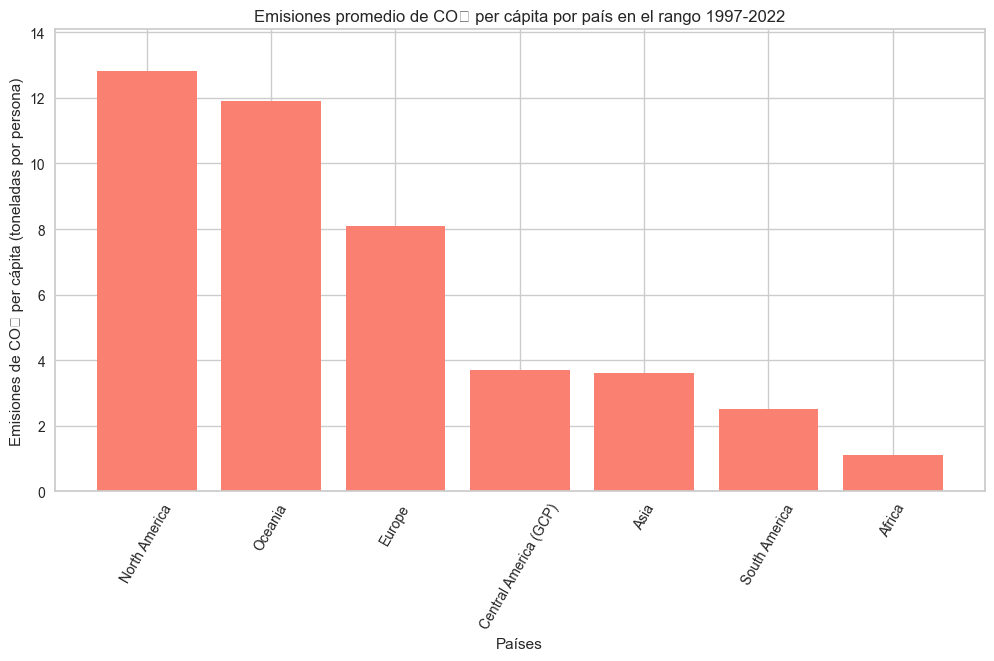

C:\Users\daher\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


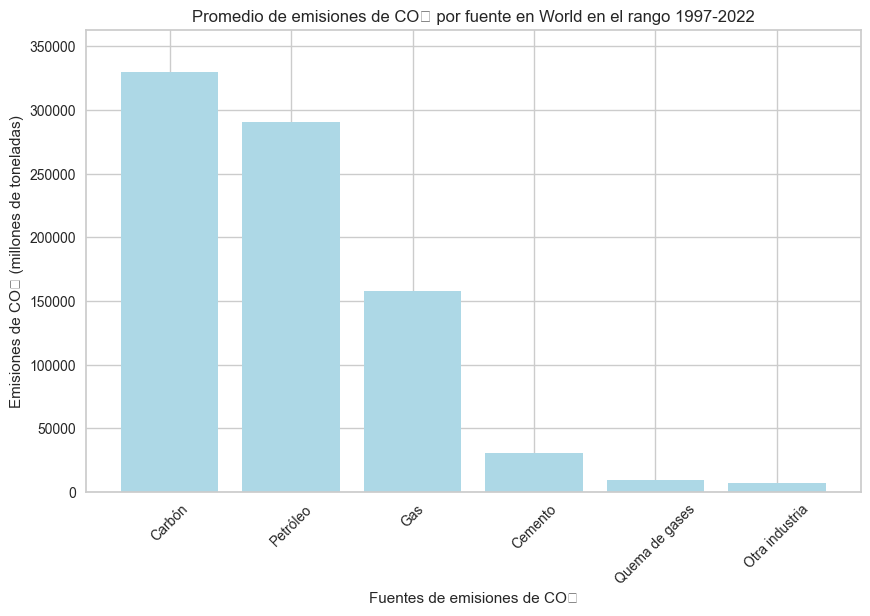

            Año  Número de datos
0  (1997, 2022]             6463


In [13]:
def bar_plot_country_emissions(data, start_year, end_year, continents=[]):
    data_range = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    data_range = data_range[data_range['country'].isin(continents)]
    total_emissions = data_range.groupby('country')['co2'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    plt.bar(total_emissions.index, total_emissions.values, color='pink')
    plt.xlabel('Países')
    plt.ylabel('Emisiones de CO₂ (millones de toneladas)')
    plt.title(f'Emisiones de CO₂ por país entre {start_year} y {end_year}')
    plt.xticks(rotation=70)
    plt.show()

def line_plot_country_emissions(data, country):
    plt.figure(figsize=(12, 6))
    data_country = data[data['country'] == country]
    total_emissions = data_country.groupby('year')['co2'].sum()
    plt.plot(total_emissions.index, total_emissions.values, label=country, marker='o',  color='lightgreen')

    plt.xlabel('Año')
    plt.ylabel('Emisiones de CO₂ (millones de toneladas)')
    plt.title(f'Emisiones de CO₂ en {country} a lo largo del tiempo')
    plt.grid(True)
    plt.xticks(range(min(data_country['year']), max(data_country['year'])+10, 15))  # Marcas cada 5 años
    plt.ylim(0, max(data_country['co2']) * 1.1)  # Ajustar el límite superior del eje y en un 10% más alto que el valor máximo
    plt.show()

def bar_plot_country_co2_per_capita_range(data, start_year, end_year, continents=[]):
    data_range = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    data_range = data_range[data_range['country'].isin(continents)]
    mean_co2_per_capita = data_range.groupby('country')['co2_per_capita'].mean().reset_index()

    mean_co2_per_capita = mean_co2_per_capita.sort_values(by='co2_per_capita', ascending=False)
    plt.figure(figsize=(12, 6))
    plt.bar(mean_co2_per_capita['country'], mean_co2_per_capita['co2_per_capita'], color='salmon')
    plt.xlabel('Países')
    plt.ylabel('Emisiones de CO₂ per cápita (toneladas por persona)')
    plt.title(f'Emisiones promedio de CO₂ per cápita por país en el rango {start_year}-{end_year}')
    plt.xticks(rotation=60)
    plt.ylim(0, max(mean_co2_per_capita['co2_per_capita'] * 1.1))
    plt.show()

def bar_plot_country_co2_sources_range(data, start_year, end_year, country):
    data_range = data[(data['country'] == country) & (data['year'] >= start_year) & (data['year'] <= end_year)]
    sum_sources = data_range[['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']].sum()

    sum_sources = sum_sources.sort_values(ascending=False)

    source_labels = ['Carbón', 'Petróleo', 'Gas', 'Cemento', 'Quema de gases', 'Otra industria']

    plt.figure(figsize=(10, 6))
    plt.bar(source_labels, sum_sources, color='lightblue')
    plt.xlabel('Fuentes de emisiones de CO₂')
    plt.ylabel('Emisiones de CO₂ (millones de toneladas)')
    plt.title(f'Promedio de emisiones de CO₂ por fuente en {country} en el rango {start_year}-{end_year}')
    plt.xticks(rotation=45)
    plt.ylim(0, max(sum_sources * 1.1))  # Ajustar el límite superior del eje y en un 10% más alto que el valor máximo
    plt.show()


# Tabla de frecuencia de emisiones de CO₂ por rango de años
def frequency_table_emissions(data, year_range):
    bins = pd.cut(data['year'], year_range)
    frequency = bins.value_counts().sort_index()
    frequency_table = pd.DataFrame({'Año': frequency.index, 'Número de datos': frequency.values})
    print(frequency_table)

# Utiliza esta función con tu DataFrame 'data'
line_plot_country_emissions(dataframe, 'World')
bar_plot_country_emissions(dataframe, 1997, 2022, continents=['North America', 'Europe', 'Oceania', 'South America', 'Central America (GCP)', 'Asia', 'Africa'])
bar_plot_country_co2_per_capita_range(dataframe, 1997, 2022, continents=['North America', 'Europe', 'Oceania', 'South America', 'Central America (GCP)', 'Asia', 'Africa'])
bar_plot_country_co2_sources_range(dataframe, 1997, 2022, 'World')
frequency_table_emissions(dataframe, year_range=[1997, 2022])


In [14]:
# Tabla de frecuencia para la variable 'co2_per_capita'
co2_per_capita_frequency = dataframe['co2_per_capita'].value_counts().reset_index().head(15)
co2_per_capita_frequency.columns = ['Annual CO2 Emissions per Capita (tonnes per person)', 'Frequency']
print("Tabla de frecuencia para la variable 'Annual CO2 Emissions per Capita' (primeros 15 elementos):")
print(tabulate(co2_per_capita_frequency.sort_values(by='Frequency', ascending=False), headers='keys', tablefmt='grid'))

# Tabla de frecuencia para la variable 'Population' dividida en intervalos: 
# Divide la población en intervalos específicos (por ejemplo, 0-1M, 1M-10M, etc.) y muestra cuántas observaciones pertenecen a cada intervalo.
population_intervals = pd.cut(dataframe['population'], bins=[0, 1000000, 10000000, 100000000, float('inf')], labels=['0-1M', '1M-10M', '10M-100M', '100M+'])
population_frequency = population_intervals.value_counts().reset_index().head(15)
population_frequency.columns = ['Population Interval', 'Frequency']
print("\nTabla de frecuencia para la variable 'Population' dividida en intervalos:")
print(tabulate(population_frequency.sort_values(by='Frequency', ascending=False), headers='keys', tablefmt='grid'))

# Proporción de emisiones de CO2 de cada país respecto al total global para un año dado
# Calcula la proporción de emisiones de CO2 de cada país con respecto al total global de emisiones de CO2. Te permite ver la contribución relativa de cada país a las emisiones globales de CO2.
total_global_co2 = dataframe['co2'].sum()
country_co2_proportion = dataframe.groupby('country')['co2'].sum() / total_global_co2
country_co2_proportion = country_co2_proportion.reset_index().sort_values(by='co2', ascending=False).head(15)
country_co2_proportion.columns = ['Country', 'CO2 Proportion']
print("\nProporción de emisiones de CO2 de cada país respecto al total global (primeros 15 elementos):")
print(tabulate(country_co2_proportion, headers='keys', tablefmt='grid'))

# Proporción de emisiones de CO2 per cápita respecto a la población total de un país para un año dado
# Calcula la proporción de emisiones de CO2 per cápita de cada país con respecto a la población total del país.
# Esto te muestra las emisiones de CO2 ajustadas por la población de cada país.
country_co2_per_capita_proportion = dataframe.groupby('country')['co2'].sum() / dataframe.groupby('country')['population'].sum()
country_co2_per_capita_proportion = country_co2_per_capita_proportion.reset_index().sort_values(by=0, ascending=False).head(15)
country_co2_per_capita_proportion.columns = ['Country', 'CO2 per Capita Proportion']
print("\nProporción de emisiones de CO2 per cápita respecto a la población total de un país (primeros 15 elementos):")
print(tabulate(country_co2_per_capita_proportion, headers='keys', tablefmt='grid'))

# Análisis temporal - Media de las emisiones de CO2 por año
# Calcula la media de las emisiones de CO2 para cada año en tu conjunto de datos. Esto te da una idea de la tendencia general de las emisiones de CO2 a lo largo del tiempo.
co2_mean_by_year = dataframe.groupby('year')['co2'].mean().reset_index().sort_values(by='year', ascending=False).head(15)
co2_mean_by_year.columns = ['Year', 'Mean CO2 Emissions']
print("\nMedia de las emisiones de CO2 por año (primeros 15 elementos):")
print(tabulate(co2_mean_by_year, headers='keys', tablefmt='grid'))


# Análisis temporal - Tasa de crecimiento anual de las emisiones de CO2
# Esta tabla muestra cómo han cambiado las emisiones de CO2 año tras año en términos de porcentaje.
co2_growth_rate = dataframe.groupby('year')['co2'].sum().pct_change().reset_index().sort_values(by='year', ascending=False).head(15)
co2_growth_rate.columns = ['Year', 'CO2 Growth Rate']
print("\nTasa de crecimiento anual de las emisiones de CO2 (primeros 15 elementos):")
print(tabulate(co2_growth_rate, headers='keys', tablefmt='grid'))

Tabla de frecuencia para la variable 'Annual CO2 Emissions per Capita' (primeros 15 elementos):
+----+-------------------------------------------------------+-------------+
|    |   Annual CO2 Emissions per Capita (tonnes per person) |   Frequency |
+====+=======================================================+=============+
|  0 |                                               3.71104 |       21458 |
+----+-------------------------------------------------------+-------------+
|  1 |                                               0       |        2348 |
+----+-------------------------------------------------------+-------------+
|  2 |                                               0.001   |         118 |
+----+-------------------------------------------------------+-------------+
|  3 |                                               0.002   |         103 |
+----+-------------------------------------------------------+-------------+
|  4 |                                               0.00

In [15]:
scaler = sklearn.preprocessing.StandardScaler()
random.seed(123)

dataScale = scaler.fit_transform(df)

# Convierte los datos escalados de nuevo a un DataFrame
scaled_df = pd.DataFrame(dataScale, columns=df.columns)

X = np.array(df)
X.shape

(48058, 77)

In [16]:
pyclustertend.hopkins(X, len(X))

0.0004255775942469938

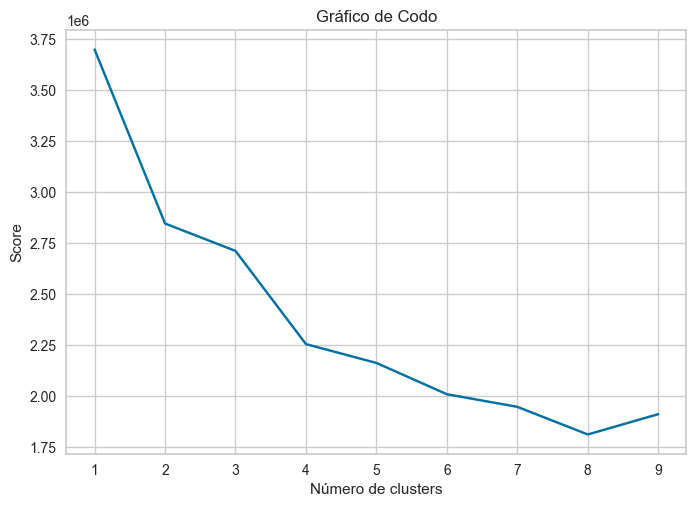

[3700465.999999997, 2847182.899454058, 2712825.116870835, 2255954.137895616, 2163597.5972284, 2010257.6991498107, 1948407.8942218013, 1812929.785581883, 1912465.2311601827]


In [17]:
numeroClusters = range(1,10)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dataScale)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()
print(wcss)

For n_clusters = 2 The average silhouette_score is : 0.9979938737730931
For n_clusters = 3 The average silhouette_score is : 0.9865444051653413


KeyboardInterrupt: 

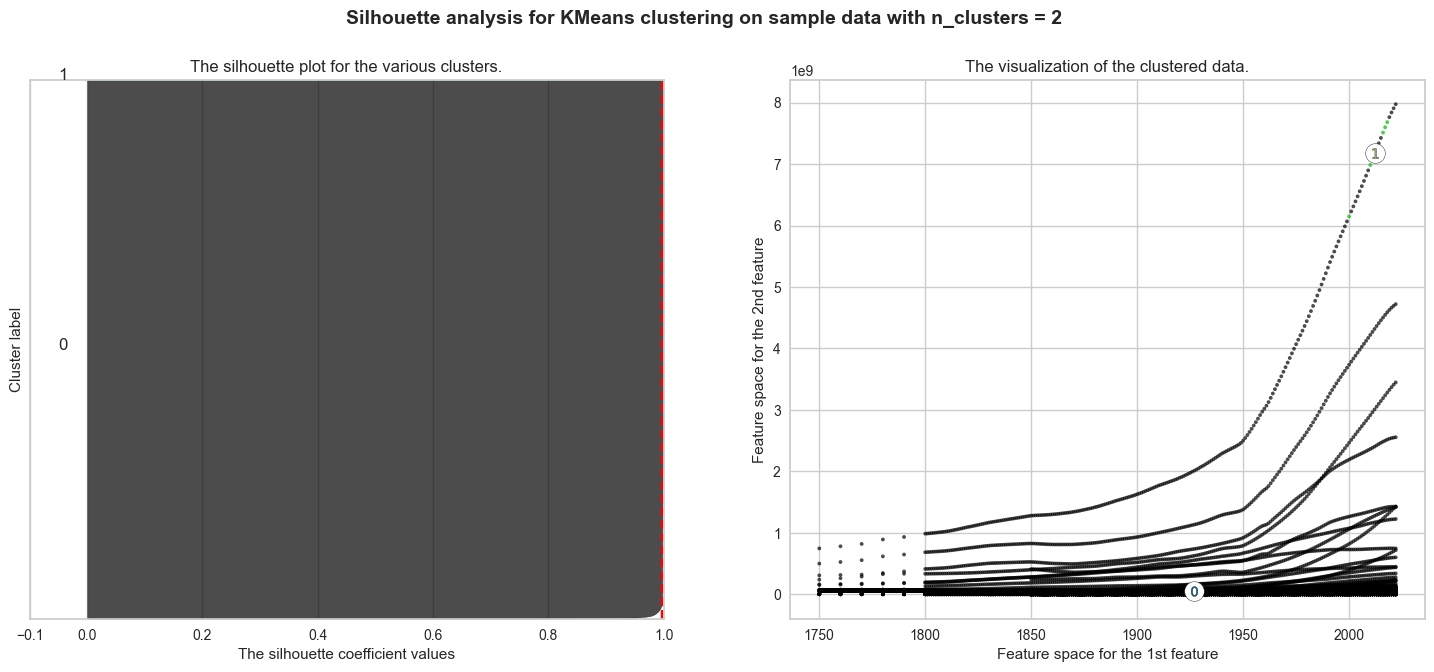

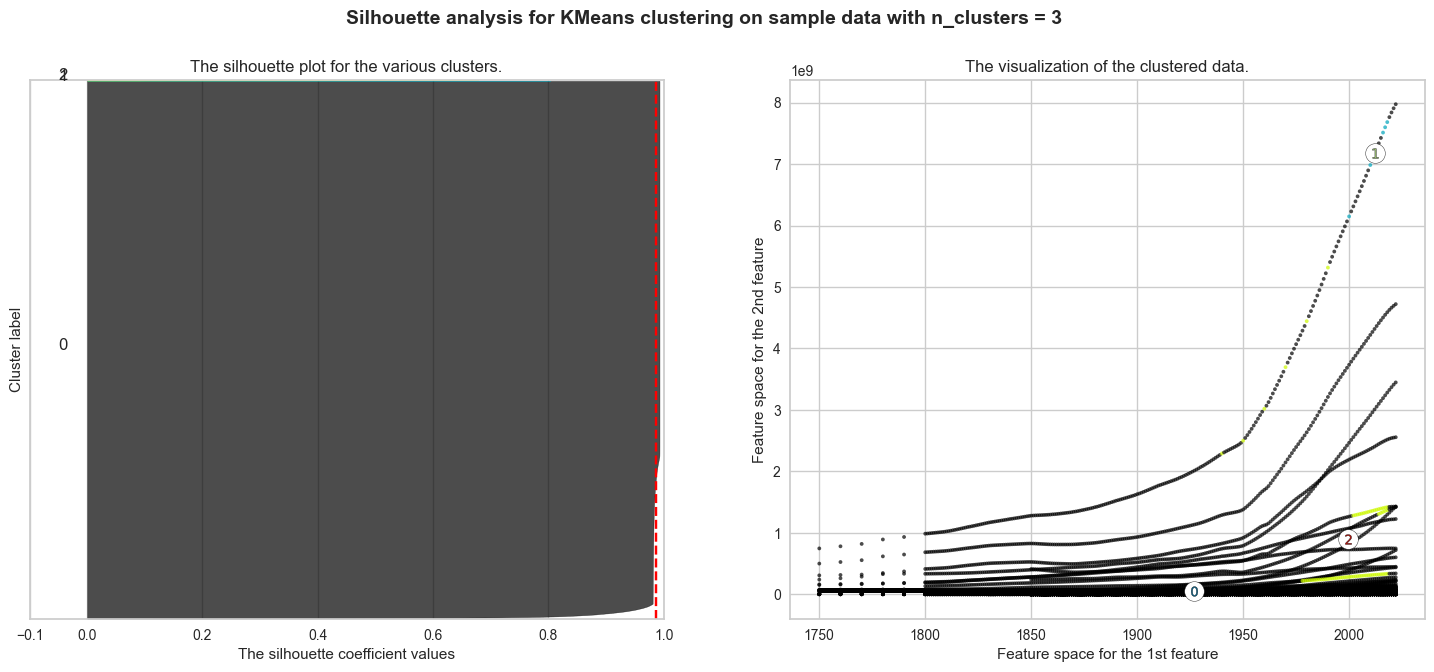

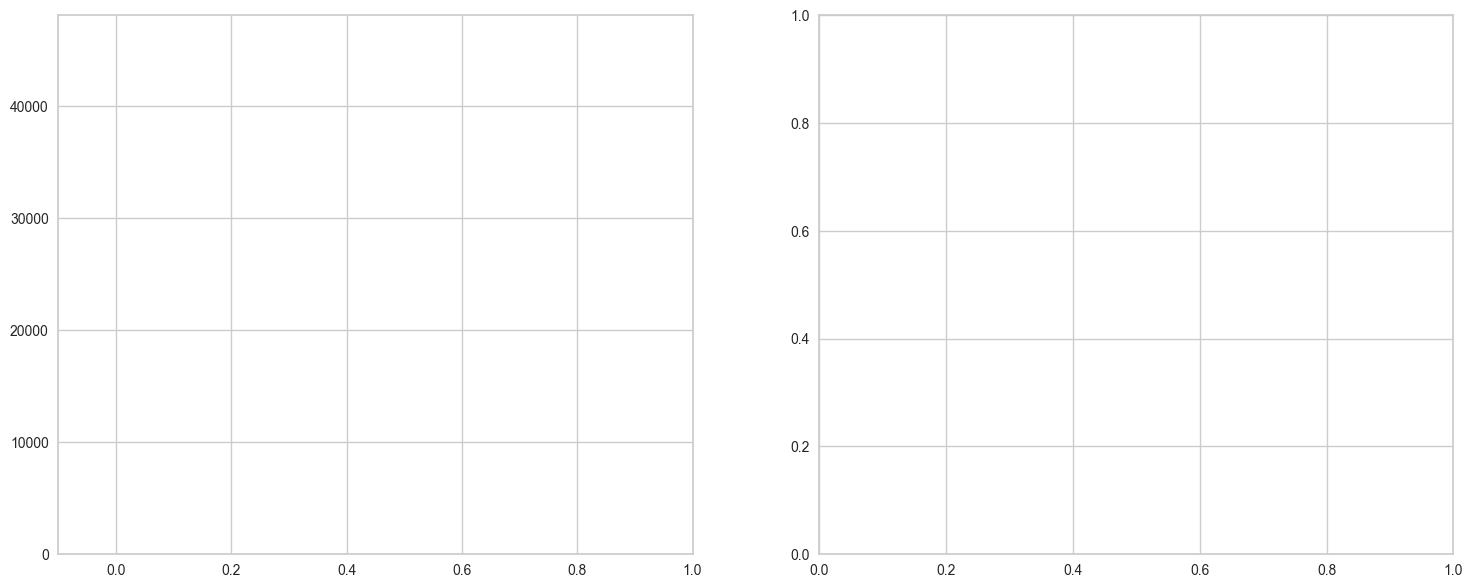

In [18]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 6  | elbow score: 2,531,412,716,003,198,164,849,917,952.000


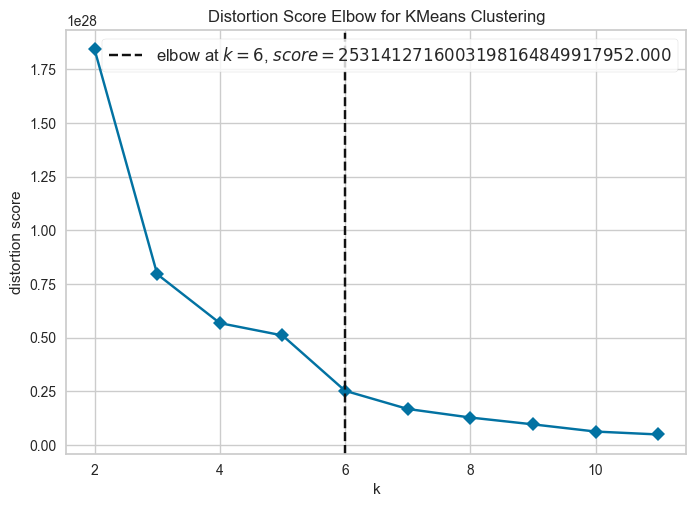

 33%|███▎      | 1/3 [00:02<00:04,  2.47s/it]

Elbow Score Plot (silhouette metric):


KeyboardInterrupt: 

In [ ]:
warnings.filterwarnings("ignore")
nK = 12   
RNDN = 55   
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  
    
model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

In [ ]:
km = cluster.KMeans(n_clusters=2).fit(X)
print (km)
n_clusters = 2

KMeans(n_clusters=2)


In [ ]:
centroides = km.cluster_centers_
print(centroides)

[[ 1.92683368e+03  6.00908065e+07  2.57779392e+11  8.97446630e+00
   6.67858244e-02  3.87836295e+02  5.79016198e+00  2.00575382e+01
   5.30305220e+02  7.40989151e+00  9.86458950e+00  7.14347813e+00
   2.41324357e+00  1.09389683e+00  3.71094342e+00  4.19522182e-01
   2.41038952e-01  1.55592460e+02  1.10456694e+00  1.30626298e+03
   6.39432723e+00  3.62421587e-01  2.15972453e+02  1.13174088e+04
   2.70730734e+04  7.77343599e+03  1.05784983e+02  1.23949885e+03
   1.00230154e+04  3.55878286e+03  3.66683520e+02  2.46309087e+04
   1.81008015e+00  3.59816803e+00  1.61533407e-01  5.06068188e+01
   5.42921519e-01  6.86290009e+00  7.70264063e+00  1.24028763e+02
   4.30747381e+00  1.49706527e+02  1.91399853e+00  5.35529192e+01
   5.70794736e-01  1.11723306e+02  2.17322354e+00  7.31949371e-02
   1.74727036e+01  2.42023077e+03  3.41039288e+00  5.15356378e+00
   3.60919358e+00  5.91579530e+00  3.44309427e+00  5.27840993e+00
   3.49423638e+00  6.07223095e+00  2.02659397e+00  2.75450155e+00
   2.79788

In [ ]:
##
## Interpretacion los grupos usando las variables numericas
##

numeric_columns = dataframe.select_dtypes(include='number').columns

# Aplicar la conversión a media solo a las columnas numéricas
df = dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())

# Asignar las etiquetas de cluster a cada muestra
etiquetas_clusters = km.labels_

for i in range(n_clusters):  # Iterar sobre cada cluster
    print(f"\nGrupo {i + 1}:")
    
    # Obtener índices de las muestras en el grupo actual
    indices_grupo = np.where(etiquetas_clusters == i)[0]
    
    

    # Mostrar estadísticas de las variables numéricas dentro del grupo
    print("Estadísticas de las variables numéricas:")

    Interpretacion_variablesNum = df.iloc[indices_grupo].describe()

    print(Interpretacion_variablesNum)


Grupo 1:
Estadísticas de las variables numéricas:
               year    population           gdp    cement_co2  \
count  48053.000000  4.805300e+04  4.805300e+04  48053.000000   
mean    1926.833684  6.009081e+07  2.577794e+11      8.974466   
std       59.411517  2.888291e+08  5.848152e+11     44.715538   
min     1750.000000  2.220000e+02  4.998000e+07      0.000000   
25%     1883.000000  6.075970e+05  2.017431e+11      0.033000   
50%     1930.000000  4.294708e+06  2.677586e+11      9.109400   
75%     1976.000000  6.083223e+07  2.677586e+11      9.109400   
max     2022.000000  7.975105e+09  4.301825e+13   1692.404000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           48053.000000  48053.000000    48053.000000     48053.000000   
mean                0.066786    387.836295        5.790162        20.057538   
std                 0.084850   1434.221929       44.762940       497.132335   
min                 0.000000      0.000000    -

In [ ]:
#
# Interpretacion de los grupos usando las variables categoricas
#

# Estudio de variables categóricas
countries_barplot = dataframe['country'].value_counts()
number_of_bars = 40
limited_countries_barplot = countries_barplot.head(number_of_bars)

for i in range(n_clusters):  # Iterar sobre cada cluster
    print(f"\nGrupo {i + 1}:")
    
    # Obtener índices de las muestras en el grupo actual
    indices_grupo = np.where(etiquetas_clusters == i)[0]
    
    df_grupo = dataframe.iloc[indices_grupo]


    # Mostrar el conteo de frecuencia de países y sus códigos ISO dentro del grupo
    print("Conteo de países dentro del grupo:")
    pais_iso_count = df_grupo[['country', 'iso_code']].value_counts()
    print(pais_iso_count)


Grupo 1:
Conteo de países dentro del grupo:
country                   iso_code
Cote d'Ivoire             CIV         273
Australia                 AUS         273
Tuvalu                    TUV         273
Brunei                    BRN         273
Greenland                 GRL         273
                                     ... 
New Caledonia             NCL         172
Turks and Caicos Islands  TCA         172
Christmas Island          CXR         171
Antarctica                ATA         171
Puerto Rico               PRI         171
Length: 219, dtype: int64

Grupo 2:
Conteo de países dentro del grupo:
Series([], dtype: int64)
